In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-int-trap)

We will approximate the integral of the function $f(x)=e^{\sin 7x}$ over the interval $[0,2]$.

In [2]:
f = x -> exp(sin(7 * x));
a = 0;
b = 2;

In lieu of the exact value, we use the `QuadGK` package to find an accurate result.
:::
```{tip}
:class: dropdown
If a function has multiple return values, you can use an underscore `_` to indicate a  return value you want to ignore.
```

In [3]:
using QuadGK
Q, _ = quadgk(f, a, b, atol=1e-14, rtol=1e-14);
println("Integral = $Q")

Integral = 2.6632197827615394


Here is the trapezoid result at $n=40$, and its error.

In [4]:
T, t, y = FNC.trapezoid(f, a, b, 40)
@show (T, Q - T);

(T, Q - T) = (2.662302935602287, 0.0009168471592522209)

In order to check the order of accuracy, we increase $n$ by orders of magnitude and observe how the error decreases.

In [5]:
n = [10^n for n in 1:5]
err = zeros(length(n))
for (k, n) in enumerate(n)
    T, t, y = FNC.trapezoid(f, a, b, n)
    err[k] = Q - T
end
@pt :header=["n", "error"] [n err]

n,error
10.0,0.0120254
100.0,0.000147305
1000.0,1.47415e-6
10000.0,1.47416e-8
100000.0,1.47416e-10


Each increase by a factor of 10 in $n$ cuts the error by a factor of about 100, which is consistent with second-order convergence. Another check is that a log-log graph should give a line of slope $-2$ as $n\to\infty$.

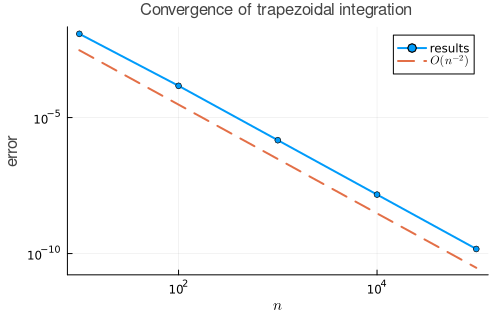

In [6]:
plot(n, abs.(err);
    m=:o, label="results",
    xaxis=(:log10, L"n"),  yaxis=(:log10, "error"),
    title="Convergence of trapezoidal integration")

# Add line for perfect 2nd order.
plot!(n, 3e-3 * (n / n[1]) .^ (-2), l=:dash, label=L"O(n^{-2})")